In [1]:
!git clone git@github.com:SMILELab-FL/FedLab.git
!cd FedLab

!pip install fedlab

from google.colab import drive
import os
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/535 CoLab/"
os.chdir(folder_path)

Cloning into 'FedLab'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
/bin/bash: line 1: cd: FedLab: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
  Created wheel for fedlab: filename=fedlab-1.3.0-py3-none-any.whl size=96034 sha256=429adcb4527cd36b8f8df6967e20d5ff3e64b8bee31f202b4f0c33b62b16961d
  Stored in directory: /root/.cache/pip/wheels/31/76/7a/030e55160ac61de33fc24ef9d65212c0cdae9e7a0720ebedb0
Successfully built fedlab
Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import sqrt

import sys
sys.path.append('../../../')

from fedlab.utils.dataset import FMNISTPartitioner
from fedlab.utils.functional import partition_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms

In [3]:
%matplotlib inline

# Load Data

In [4]:
root = "../../../../data/FMNIST"
trainset = FashionMNIST(root=root, train=True, download=True)

100%|██████████| 26.4M/26.4M [00:07<00:00, 3.60MB/s]


Extracting ../../../../data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../../../data/FMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 228kB/s]


Extracting ../../../../data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../../../data/FMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:04<00:00, 1.09MB/s]


Extracting ../../../../data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../../../data/FMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.41MB/s]

Extracting ../../../../data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../../../data/FMNIST/FashionMNIST/raw



In [5]:
def dict_value2key(d, value):
    return list(d.keys())[list(d.values()).index(value)]

Original data visualization:

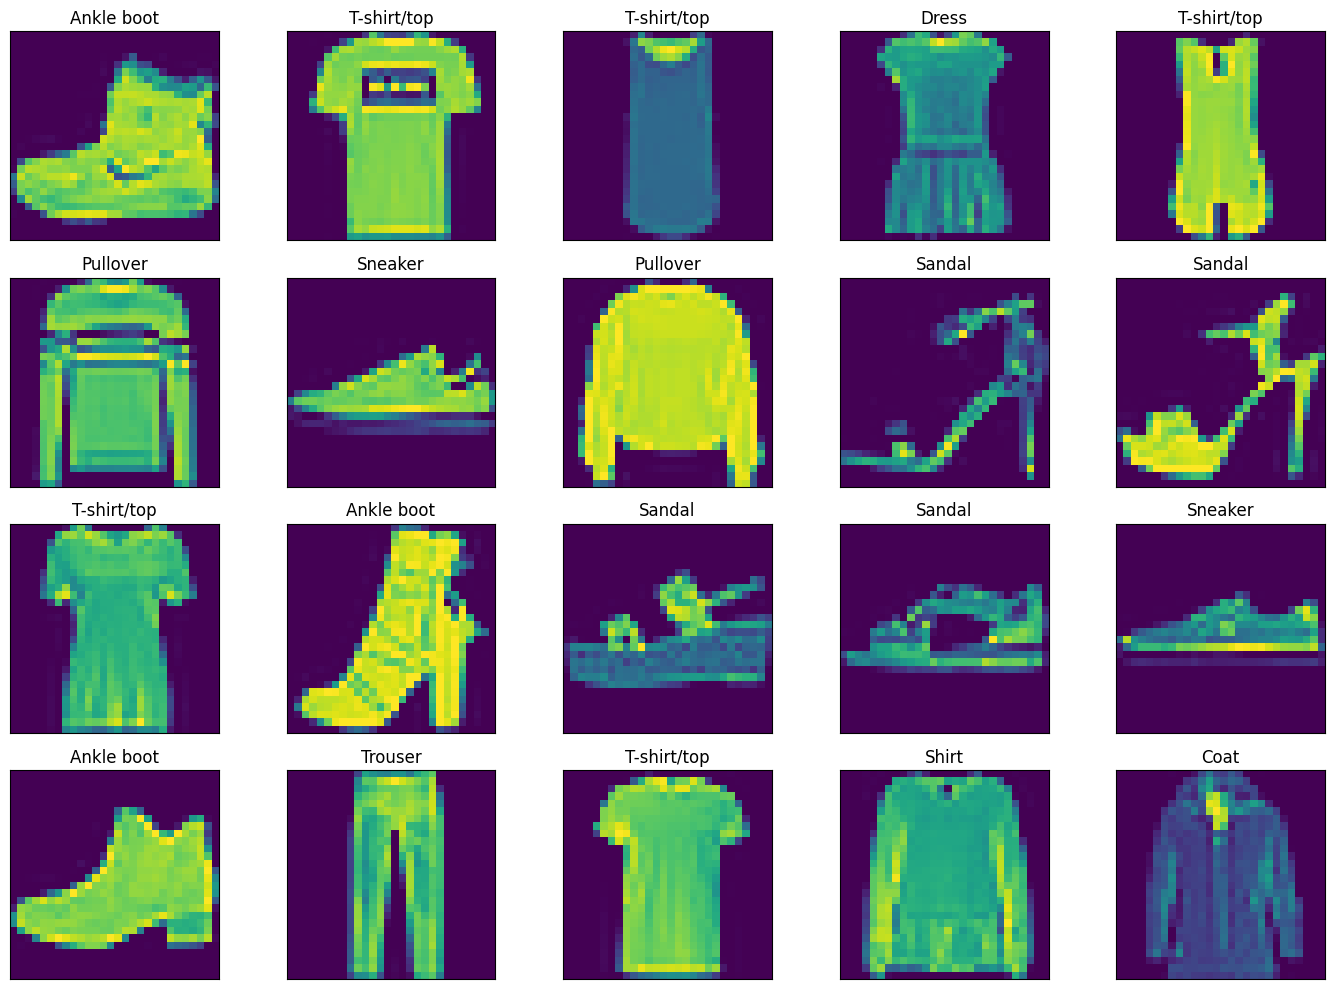

In [6]:
class_to_idx = trainset.class_to_idx

fig = plt.figure(figsize=(15, 10))

for idx in range(20):
    ax = fig.add_subplot(4, 20//4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(trainset[idx][0]), cmap='viridis')
    cls_name = dict_value2key(class_to_idx, trainset[idx][1])
    ax.set_title(f"{cls_name}")
    ax.patch.set_facecolor('white')
    fig.tight_layout()

# Data Partition

In [7]:
num_classes = 10
num_clients = 10
seed = 2021

col_names = [f"class{i}" for i in range(num_classes)]

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

## Label Distribution Skew
### Quantity-based

1. When \#C=1:

Text(0.5, 0, 'sample num')

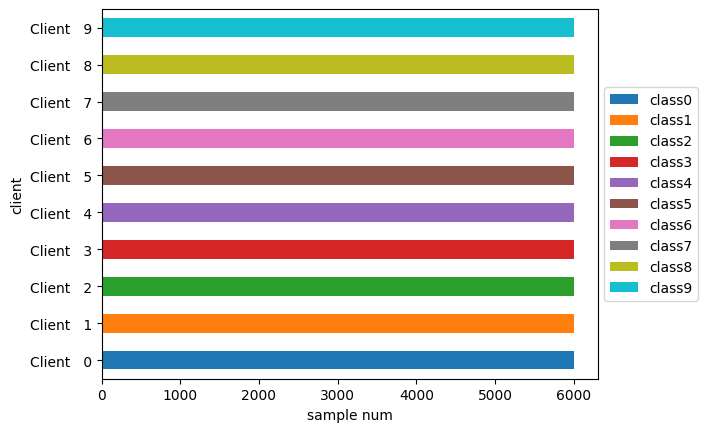

In [8]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets,
                                           num_clients=num_clients,
                                           partition="noniid-#label",
                                           major_classes_num=1,
                                           seed=seed)

# generate partition report
csv_file = "fmnist_noniid-label_1_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

2. \#C=2

Text(0.5, 0, 'sample num')

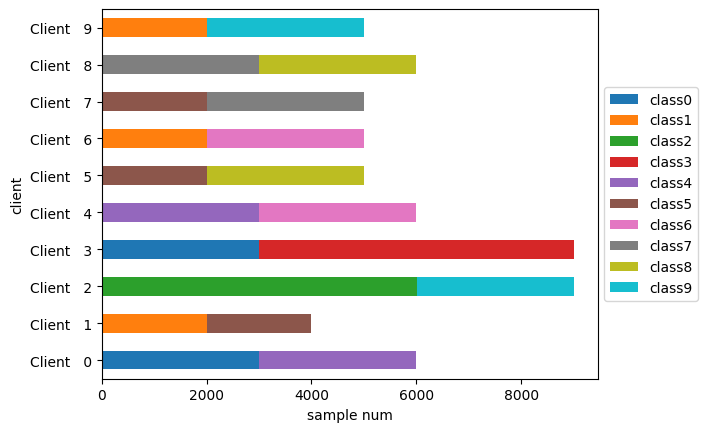

In [9]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets,
                                           num_clients=num_clients,
                                           partition="noniid-#label",
                                           major_classes_num=2,
                                           seed=seed)

# generate partition report
csv_file = "fmnist_noniid-label_2_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

3. \#C=3

Text(0.5, 0, 'sample num')

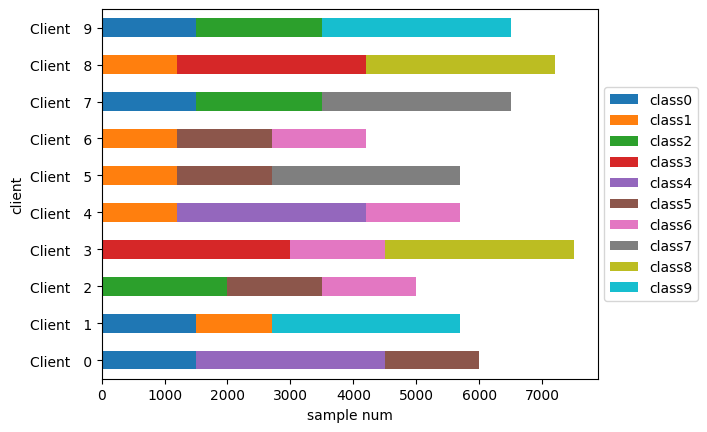

In [10]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets,
                                           num_clients=num_clients,
                                           partition="noniid-#label",
                                           major_classes_num=3,
                                           seed=seed)

# generate partition report
csv_file = "fmnist_noniid-label_3_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

### Distribution-based (Dirichlet)

Text(0.5, 0, 'sample num')

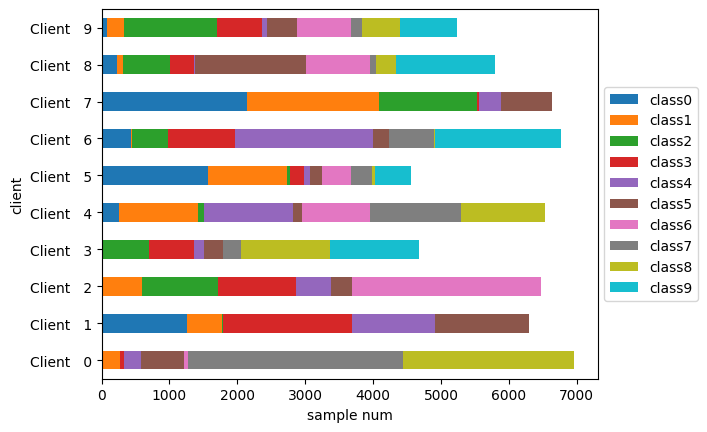

In [11]:
# perform partition
noniid_labeldir_part = FMNISTPartitioner(trainset.targets,
                                        num_clients=num_clients,
                                        partition="noniid-labeldir",
                                        dir_alpha=0.5,
                                        seed=seed)

# generate partition report
csv_file = "fmnist_noniid_labeldir_clients_10.csv"
partition_report(trainset.targets, noniid_labeldir_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

noniid_labeldir_part_df = pd.read_csv(csv_file,header=1)
noniid_labeldir_part_df = noniid_labeldir_part_df.set_index('client')
for col in col_names:
    noniid_labeldir_part_df[col] = (noniid_labeldir_part_df[col] * noniid_labeldir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_labeldir_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

## Feature Distribution Skew
### Noise-based

In [12]:
# this class is from NIID-bench official code:
# https://github.com/Xtra-Computing/NIID-Bench/blob/main/utils.py
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1., net_id=None, total=0):
        self.std = std
        self.mean = mean
        self.net_id = net_id
        self.num = int(sqrt(total))
        if self.num * self.num < total:
            self.num = self.num + 1

    def __call__(self, tensor):
        if self.net_id is None:
            return tensor + torch.randn(tensor.size()) * self.std + self.mean
        else:
            tmp = torch.randn(tensor.size())
            filt = torch.zeros(tensor.size())
            size = int(28 / self.num)
            row = int(self.net_id / size)
            col = self.net_id % size
            for i in range(size):
                for j in range(size):
                    filt[:, row * size + i, col * size + j] = 1
            tmp = tmp * filt
            return tensor + tmp * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)


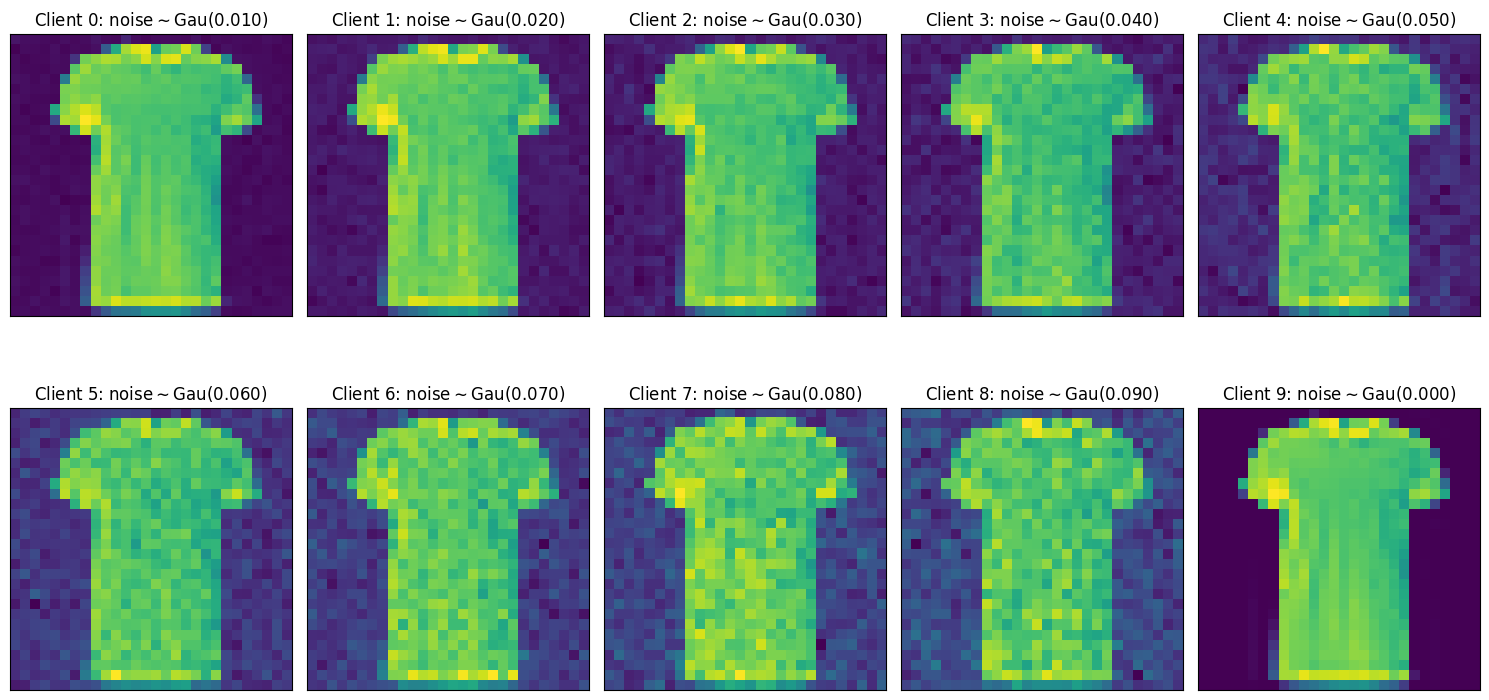

In [13]:
noise = 0.1
num_clients = 10
img_idx = 17

fig = plt.figure(figsize=(15, 10))

for cid in range(num_clients):
    if cid == num_clients - 1:
        noise_level = 0
    else:
        noise_level = noise / num_clients * (cid + 1)  # a little different from original NIID-bench
    transform = transforms.Compose([transforms.ToTensor(),
                                    AddGaussianNoise(0., noise_level)])
    trainset_feature_skew = FashionMNIST(root=root, train=True, download=True,
                                         transform=transform)
    ax = fig.add_subplot(2, num_clients//2, cid + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(trainset_feature_skew[img_idx][0]), cmap='viridis')
    ax.set_title(f"Client {cid}: noise$\sim$Gau({noise_level:.3f})")
    ax.patch.set_facecolor('white')
    fig.tight_layout()


We also provide demo of "feature distribution kew"-"noise-based" FedAvg on FMNIST: [feature-skew-fedavg](../../feature-skew-fedavg/).

- Top-1 accuracy for FMNIST in paper: $89.1\% \pm 0.3\%$.
- Top-1 accuracy for FMNIST in this demo: $89.37\% \pm 0.14 \%$ (5 runs).

For more details, please check [demo README.md](../../feature-skew-fedavg/README.md).

### Synthetic

FMNIST does not support "feature distribution skew"-"synthetic" partition.

### Real

FMNIST does not support "feature distribution skew"-"real" partition.

## Quantity Skew (Dirichlet)

Text(0.5, 0, 'sample num')

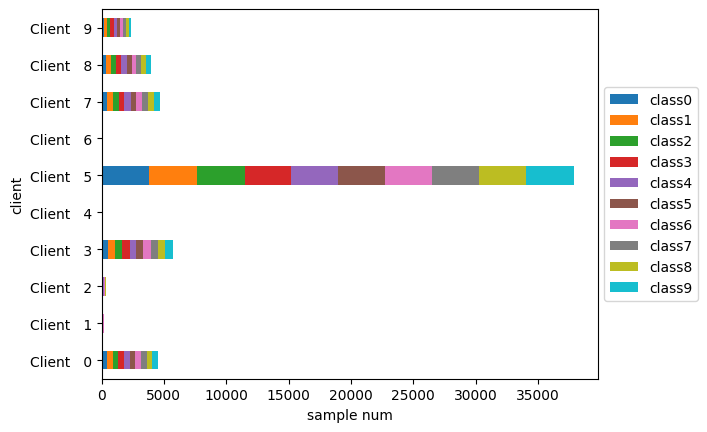

In [14]:
# perform partition
unbalance_part = FMNISTPartitioner(trainset.targets,
                                  num_clients=num_clients,
                                  partition="unbalance",
                                  dir_alpha=0.5,
                                  seed=seed)

# generate partition report
csv_file = "fmnist_unbalance_clients_10.csv"
partition_report(trainset.targets, unbalance_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

unbalance_part_df = pd.read_csv(csv_file,header=1)
unbalance_part_df = unbalance_part_df.set_index('client')
for col in col_names:
    unbalance_part_df[col] = (unbalance_part_df[col] * unbalance_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

## IID

Text(0.5, 0, 'sample num')

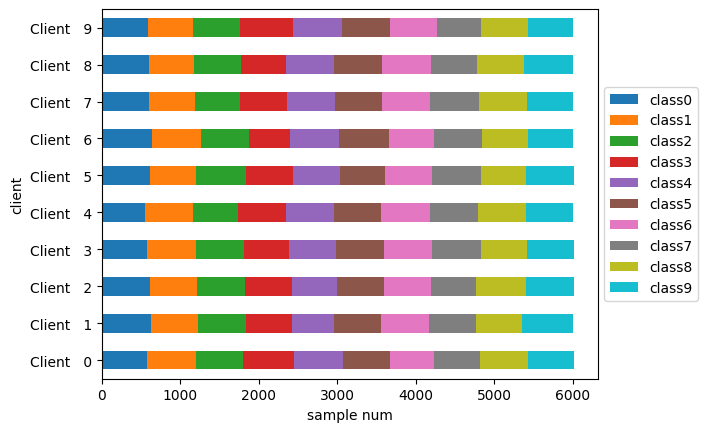

In [15]:
# perform partition
iid_part = FMNISTPartitioner(trainset.targets,
                            num_clients=num_clients,
                            partition="iid",
                            seed=seed)

# generate partition report
csv_file = "fmnist_iid_clients_10.csv"
partition_report(trainset.targets, iid_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

iid_part_df = pd.read_csv(csv_file,header=1)
iid_part_df = iid_part_df.set_index('client')
for col in col_names:
    iid_part_df[col] = (iid_part_df[col] * iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
iid_part_df[col_names].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

# References

- Li, Q., Diao, Y., Chen, Q., & He, B. (2021). Federated learning on non-iid data silos: An experimental study. arXiv preprint arXiv:2102.02079.